Question: How does the distribution of Attack power for Pikachu compare to the distribution of Attack power of other first generation Pokémon?

This is a descriptive observational study using a census of all 151 Generation I Pokémon. I will use data from all species because a full population will give the most exact results.

This dataset was originally collected and compiled by a community of Pokémon fans who worked together to make the information accessible in a single place. The data includes details about all available Pokémon, they chose to keep as much information as possible. I did not personally collect this dataset; instead, I am using the work of this fan community as the basis of my investigation. The origins of the dataset come from enthusiasts who gathered information from official Pokémon games and related resources.

Some potential biases that may be present in this dataset include human error in transcription, differences in interpretation of certain stats, and the fact that it could reflect what fans considered important enough to include. For example, fans might have prioritized popular or well-documented data while overlooking niche details. Because the dataset is fan-curated rather than directly from an official source, it may also lack consistency in how values were verified. These factors could influence the accuracy and balance of my study.


Index(['name', 'pokedex_number', 'abilities', 'attack', 'capture_rate',
       'classfication', 'defense', 'height_m', 'hp', 'sp_attack', 'sp_defense',
       'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')
Pikachu's Attack: 55
Average Gen I Attack: 74.53
Median Gen I Attack: 70.0
Mode Gen I Attack: 65
Pikachu's Attack Percentile (Gen I): 28.81%

Measures of Spread (Attack, Gen I):
Standard Deviation: 29.86
Variance: 891.84
Range: 150
IQR (Interquartile Range): 44.0
Pikachu's Attack Z-score: -0.65

Five Number Summary (Attack, Gen I):
Minimum: 5
Q1 (25%): 51.0
Median (50%): 70.0
Q3 (75%): 95.0
Maximum: 155


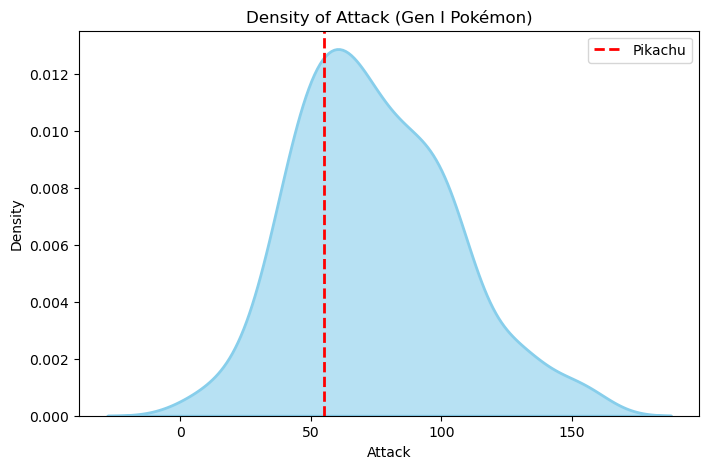

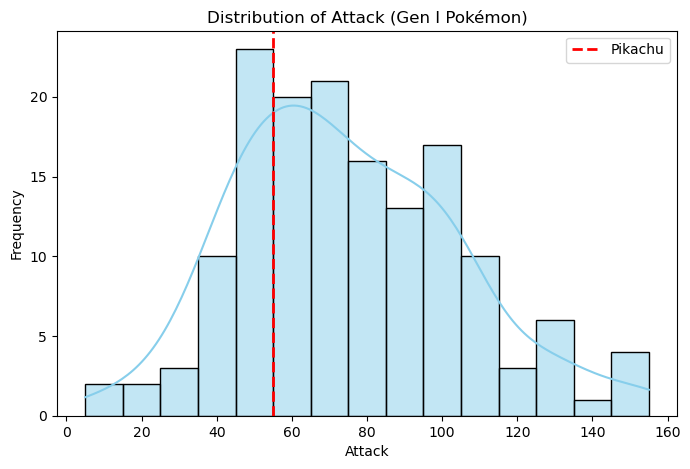

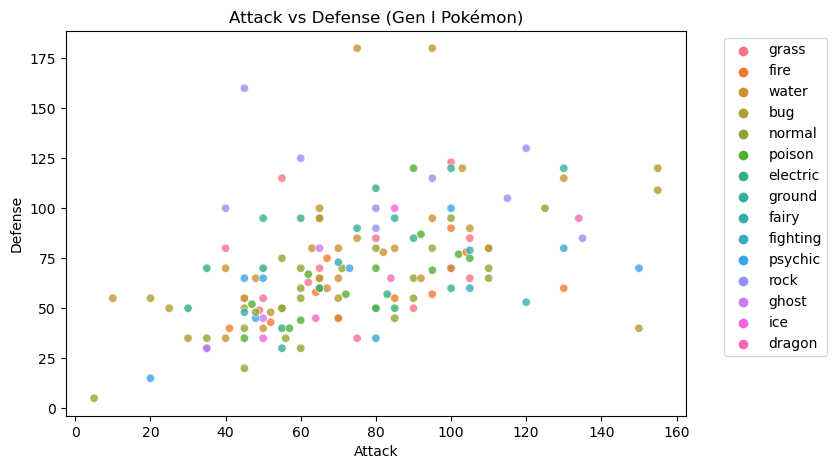

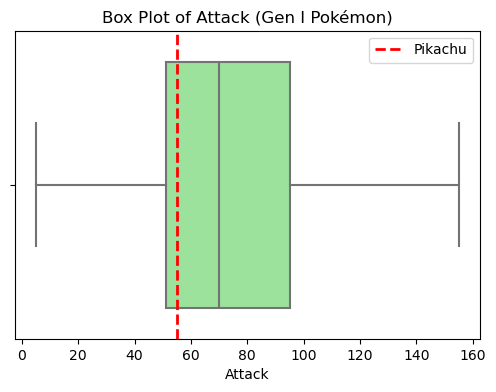

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import percentileofscore

warnings.simplefilter(action='ignore', category=FutureWarning)

# Load dataset
df = pd.read_csv("pokemon.csv")

# Clean column names (remove any extra spaces)
df.columns = df.columns.str.strip()

# Filter for Generation I
gen1 = df[df["generation"] == 1]

# Pikachu's Attack vs Average
# Check what the name column is actually called
print(df.columns)

# Replace with the actual column name for Pokémon names
pikachu_attack = gen1[gen1["name"] == "Pikachu"]["attack"].values[0]
avg_attack = gen1["attack"].mean()
median_attack = gen1["attack"].median()
mode_attack = gen1["attack"].mode()[0]

print(f"Pikachu's Attack: {pikachu_attack}")
print(f"Average Gen I Attack: {avg_attack:.2f}")
print(f"Median Gen I Attack: {median_attack}")
print(f"Mode Gen I Attack: {mode_attack}")

# Percentile rank of Pikachu's Attack
pikachu_percentile = percentileofscore(gen1["attack"], pikachu_attack)
print(f"Pikachu's Attack Percentile (Gen I): {pikachu_percentile:.2f}%")

# Measures of Spread
attack_std = gen1["attack"].std()   # standard deviation
attack_var = gen1["attack"].var()   # variance
attack_range = gen1["attack"].max() - gen1["attack"].min()  # range
attack_iqr = gen1["attack"].quantile(0.75) - gen1["attack"].quantile(0.25)  # IQR

print("\nMeasures of Spread (Attack, Gen I):")
print(f"Standard Deviation: {attack_std:.2f}")
print(f"Variance: {attack_var:.2f}")
print(f"Range: {attack_range}")
print(f"IQR (Interquartile Range): {attack_iqr}")

# Z-score for Pikachu's Attack
pikachu_zscore = (pikachu_attack - avg_attack) / attack_std
print(f"Pikachu's Attack Z-score: {pikachu_zscore:.2f}")

# Five number summary
five_num = {
    "Minimum": gen1["attack"].min(),
    "Q1 (25%)": gen1["attack"].quantile(0.25),
    "Median (50%)": gen1["attack"].median(),
    "Q3 (75%)": gen1["attack"].quantile(0.75),
    "Maximum": gen1["attack"].max()
}

print("\nFive Number Summary (Attack, Gen I):")
for k, v in five_num.items():
    print(f"{k}: {v}")

# All plots come AFTER stats

# KDE plot (density of distribution) with seaborn
plt.figure(figsize=(8,5))
sns.kdeplot(gen1["attack"], fill=True, color="skyblue", linewidth=2, alpha=0.6)
plt.axvline(pikachu_attack, color="red", linestyle="--", linewidth=2, label="Pikachu")
plt.title("Density of Attack (Gen I Pokémon)")
plt.xlabel("Attack")
plt.ylabel("Density")
plt.legend()
plt.show()

# Histogram of Attack
plt.figure(figsize=(8,5))
sns.histplot(gen1["attack"], bins=15, kde=True, color="skyblue")
plt.axvline(pikachu_attack, color="red", linestyle="--", linewidth=2, label="Pikachu")
plt.title("Distribution of Attack (Gen I Pokémon)")
plt.xlabel("Attack")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Scatterplot Attack vs Defense 
if "defense" in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(
        data=gen1,
        x="attack",
        y="defense",
        hue="type1" if "type1" in df.columns else None,
        alpha=0.8
    )
    plt.title("Attack vs Defense (Gen I Pokémon)")
    plt.xlabel("Attack")
    plt.ylabel("Defense")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Box plot of Attack
plt.figure(figsize=(6,4))
sns.boxplot(x=gen1["attack"], color="lightgreen")
plt.axvline(pikachu_attack, color="red", linestyle="--", linewidth=2, label="Pikachu")
plt.title("Box Plot of Attack (Gen I Pokémon)")
plt.xlabel("Attack")
plt.legend()
plt.show()


Pikachu’s Attack is 55, which is lower than the average 74.5 and median 70 for first-generation Pokémon. The histogram and box plot show that most Pokémon fall between about 50–100 Attack, placing Pikachu just above the lower quartile. Pikachu is weaker than most of its peers but not an outlier.

Attack values for Generation I Pokémon range from 5 to 155, with a standard deviation of 29.9 and an interquartile range of 44. This wide spread highlights the diversity in strength across Pokémon. Pikachu’s below-average attack suggests its lasting popularity is due more to cultural significance than just battle power.